## Simple DSEF
Simple Implementation of DSEF Code to search for the closest line in an example image.

**Imports**

In [1]:
import sys
import os

import cv2
import matplotlib.pyplot as plt


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import dsef

**Load Image**

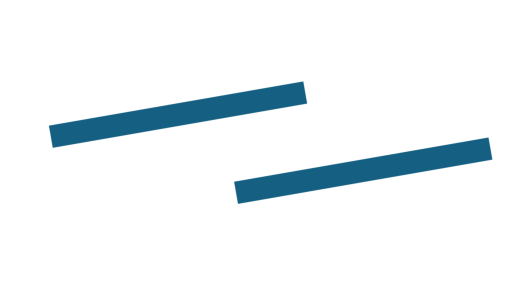

In [2]:
image_path = 'imgs/input_image.jpg'
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image '{image_path}' not found.")
    
img = cv2.imread(image_path)

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

**Initiate DSEF Class**

In [3]:
initial_direction_deg = 270     # The initial direction in degrees
dir_span = 90                   # The span of directions for search

start_pix = (0+200, 0+200)      # Starting pixel (x, y)
end_pix = (1920, 1080)          # Ending pixel (x, y)
speed = "medium"                # Speed of the algorithm, "high", "medium", or "low"
debug = True

dsef_ = dsef.Dsef(initial_direction_deg, dir_span, start_pix, end_pix, speed, debug)

**Edge Search**

The dots in the image below represents the steps of the algorithm

[DEBUG] Overriding d_theta to: 4.0
[DEBUG] Distance between start and end: 1932.0455481173315
[DEBUG] Search step: 32.200759135288855
[DEBUG] Follower step: 22.029071700822982
[DEBUG] Edge found. Breaking EdgeSearch.
Edge found: True


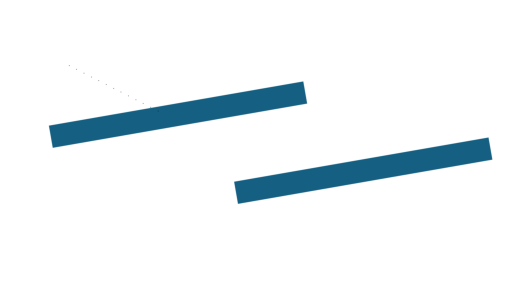

In [4]:
## Perform edge search
edge_found, img = dsef_.edge_search(img)

if edge_found:
    print(f"Edge found: {edge_found}")

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()

**Edge Follow**

The dots parallel to the edge of the rectangle shows the following path of DSEF algorithm

[DEBUG] Distance between start and end: 1932.0455481173315
[DEBUG] Search step: 32.200759135288855
[DEBUG] Follower step: 22.029071700822982
[DEBUG] EdgeFollow message: CANCEL. WE LOST THE EDGE
Found edge line [(x1,y1),(x2,y2)]: [(522, 380), (-17152.38437246058, 3496.470832276853)]


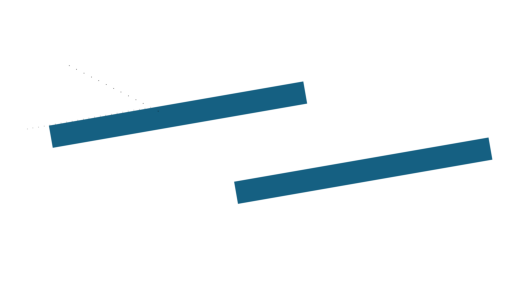

In [5]:
found_edge_line = None
if edge_found:
    # if the search found an edge, follow it
    found_edge_line, image = dsef_.edge_follow(img)
    
print(f"Found edge line [(x1,y1),(x2,y2)]: {found_edge_line}")

# Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  # Hide the axes
plt.show()